In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltd
import seaborn as sns

Data source: https://datahub.transportation.gov/stories/s/Next-Generation-Simulation-NGSIM%EF%BF%BEOpen-Data/i5zb-xe34/ - Trajectory Data from the story "Trajectory Data" in the dataset.

In [4]:
import pandas as pd

file_path = "Next_Generation_Simulation__NGSIM.csv"

df = pd.read_csv(file_path)

print(df.head())


   Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
2        2224      6548          1902  1113437421700   41.429   472.901   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
2  6042814.264  2133542.012      14.3      6.9  ...     NaN     NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN     NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   

   Section_ID  Direction  Movement  Preceding  Following  Space_Headway  \
0         NaN        NaN       NaN        500  

In [7]:
# Filter out the rows where O_Zone is a missing value
missing_o_zone = df[df['O_Zone'].isnull()]

# View the corresponding "Location" column for these rows
locations_with_missing_o_zone = missing_o_zone['Location'].unique()

# Output related Location
print(locations_with_missing_o_zone)


['us-101' 'i-80']


In [8]:
# Load the data
df = pd.read_csv(file_path)

# Output the number of missing values per column
df.isnull().sum()


Vehicle_ID            0
Frame_ID              0
Total_Frames          0
Global_Time           0
Local_X               0
Local_Y               0
Global_X              0
Global_Y              0
v_length              0
v_Width               0
v_Class               0
v_Vel                 0
v_Acc                 0
Lane_ID               0
O_Zone           776398
D_Zone           776398
Int_ID           776398
Section_ID       776398
Direction        776398
Movement         776398
Preceding             0
Following             0
Space_Headway         0
Time_Headway          0
Location              0
dtype: int64

In [9]:
# Keep only rows where Location is 'us-101'
df_us101 = df[df['Location'] == 'us-101']

# Print the filtered data
print(df_us101.head())


   Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   
5        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN     NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   
5  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   

   Section_ID  Direction  Movement  Preceding  Following  Space_Headway  \
0         NaN        NaN       NaN        500  

In [10]:
# Sort by Vehicle_ID in ascending order
df_us101_sorted = df_us101.sort_values(by='Vehicle_ID', ascending=True)

# Print the sorted data
print(df_us101_sorted.head())


        Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X  Local_Y  \
838834           1       297           569  1118847871700   51.582  165.927   
857823           1       248           421  1118848781800   55.493  353.730   
51118            1       417           569  1118847883700   53.644  456.083   
705629           1       347           569  1118847876700   51.994  278.207   
899468           1       276           569  1118847869600   51.213  124.815   

           Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
838834  6451172.880  1873254.074      47.0      8.5  ...     NaN     NaN   
857823  6451307.663  1873111.583      15.0      6.4  ...     NaN     NaN   
51118   6451380.565  1873045.850      47.0      8.5  ...     NaN     NaN   
705629  6451251.760  1873170.480      47.0      8.5  ...     NaN     NaN   
899468  6451144.650  1873285.171      47.0      8.5  ...     NaN     NaN   

        Section_ID  Direction  Movement  Preceding  Following  Space

In [11]:
import pandas as pd

# Assume df_us101_sorted is already loaded
# Convert 'Global_Time' from milliseconds (epoch ms) to datetime
df_us101_sorted = df_us101_sorted.copy()  # avoid SettingWithCopy warnings
df_us101_sorted['Global_Time'] = pd.to_datetime(df_us101_sorted['Global_Time'], unit='ms')

# Shift time by 7 hours (adjust to UTC-7)
df_us101_sorted['Global_Time'] = df_us101_sorted['Global_Time'] - pd.Timedelta(hours=7)

# Output the converted data
print("\nConverted 'Global_Time' to datetime and adjusted by UTC-7")
print(df_us101_sorted.head())



Converted 'Global_Time' to datetime and adjusted by UTC-7
        Vehicle_ID  Frame_ID  Total_Frames             Global_Time  Local_X  \
838834           1       297           569 2005-06-15 08:04:31.700   51.582   
857823           1       248           421 2005-06-15 08:19:41.800   55.493   
51118            1       417           569 2005-06-15 08:04:43.700   53.644   
705629           1       347           569 2005-06-15 08:04:36.700   51.994   
899468           1       276           569 2005-06-15 08:04:29.600   51.213   

        Local_Y     Global_X     Global_Y  v_length  v_Width  ...  D_Zone  \
838834  165.927  6451172.880  1873254.074      47.0      8.5  ...     NaN   
857823  353.730  6451307.663  1873111.583      15.0      6.4  ...     NaN   
51118   456.083  6451380.565  1873045.850      47.0      8.5  ...     NaN   
705629  278.207  6451251.760  1873170.480      47.0      8.5  ...     NaN   
899468  124.815  6451144.650  1873285.171      47.0      8.5  ...     NaN   

   

In [12]:
# Sort by Global_Time in ascending order within each Vehicle_ID
df_us101_sorted = df_us101_sorted.sort_values(
    by=['Vehicle_ID', 'Global_Time'], ascending=[True, True]
)

# Output the data sorted by Vehicle_ID and Global_Time in ascending order
print("\nSorted Data by Vehicle_ID and Global_Time")
print(df_us101_sorted.head())



Sorted Data by Vehicle_ID and Global_Time
        Vehicle_ID  Frame_ID  Total_Frames             Global_Time  Local_X  \
768484           1       270           569 2005-06-15 08:04:29.000   51.164   
691407           1       272           569 2005-06-15 08:04:29.200   51.143   
899468           1       276           569 2005-06-15 08:04:29.600   51.213   
315463           1       285           569 2005-06-15 08:04:30.500   51.290   
838834           1       297           569 2005-06-15 08:04:31.700   51.582   

        Local_Y     Global_X     Global_Y  v_length  v_Width  ...  D_Zone  \
768484  112.878  6451136.708  1873294.084      47.0      8.5  ...     NaN   
691407  116.878  6451139.397  1873291.122      47.0      8.5  ...     NaN   
899468  124.815  6451144.650  1873285.171      47.0      8.5  ...     NaN   
315463  141.929  6451156.749  1873271.844      47.0      8.5  ...     NaN   
838834  165.927  6451172.880  1873254.074      47.0      8.5  ...     NaN   

        Int_ID  Sec

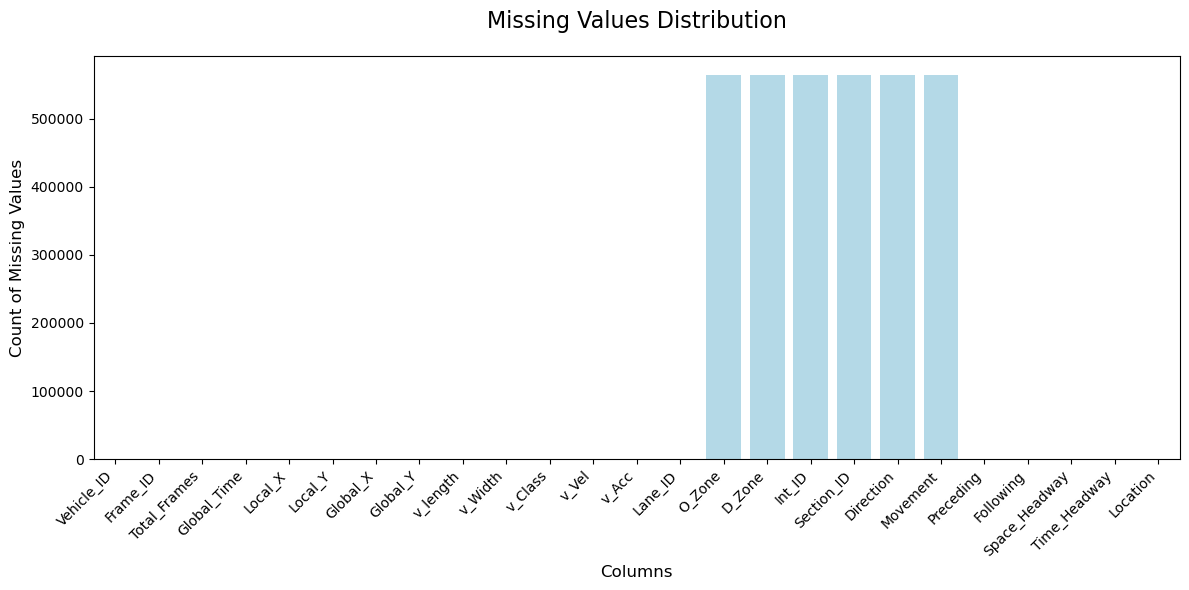

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values for each column
missing_values = df_us101_sorted.isnull().sum()

# Create figure
plt.figure(figsize=(12, 6))

# Bar plot (no data labels)
sns.barplot(
    x=missing_values.index,
    y=missing_values.values,
    color='skyblue',
    alpha=0.7
)

# Beautify
plt.title('Missing Values Distribution', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels

# Layout & save
plt.tight_layout()
plt.savefig(r'D:\UoM\DATA72002\Data\missing_values_plot.png', dpi=300)
plt.show()


In [14]:
# Check for missing values
print("\nMissing Values Check")
print(df_us101_sorted.isnull().sum())

# Drop specified columns
df_us101_sorted = df_us101_sorted.drop(
    ['O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement'],
    axis=1
)

# Print columns after deletion to confirm
print("\nColumns After Deletion")
print(df_us101_sorted.columns)

# Save the processed data to a new CSV file
df_us101_sorted.to_csv(r'D:\UoM\DATA72002\Data\Cleaned1_NGSIM.csv', index=False)

print("\nData saved to Cleaned1_NGSIM.csv")



Missing Values Check
Vehicle_ID            0
Frame_ID              0
Total_Frames          0
Global_Time           0
Local_X               0
Local_Y               0
Global_X              0
Global_Y              0
v_length              0
v_Width               0
v_Class               0
v_Vel                 0
v_Acc                 0
Lane_ID               0
O_Zone           564397
D_Zone           564397
Int_ID           564397
Section_ID       564397
Direction        564397
Movement         564397
Preceding             0
Following             0
Space_Headway         0
Time_Headway          0
Location              0
dtype: int64

Columns After Deletion
Index(['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class',
       'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding', 'Following', 'Space_Headway',
       'Time_Headway', 'Location'],
      dtype='object')

Data saved to Cleaned1_NGSIM.csv


Histograms saved to: D:\UoM\DATA72002\Data\histograms.png


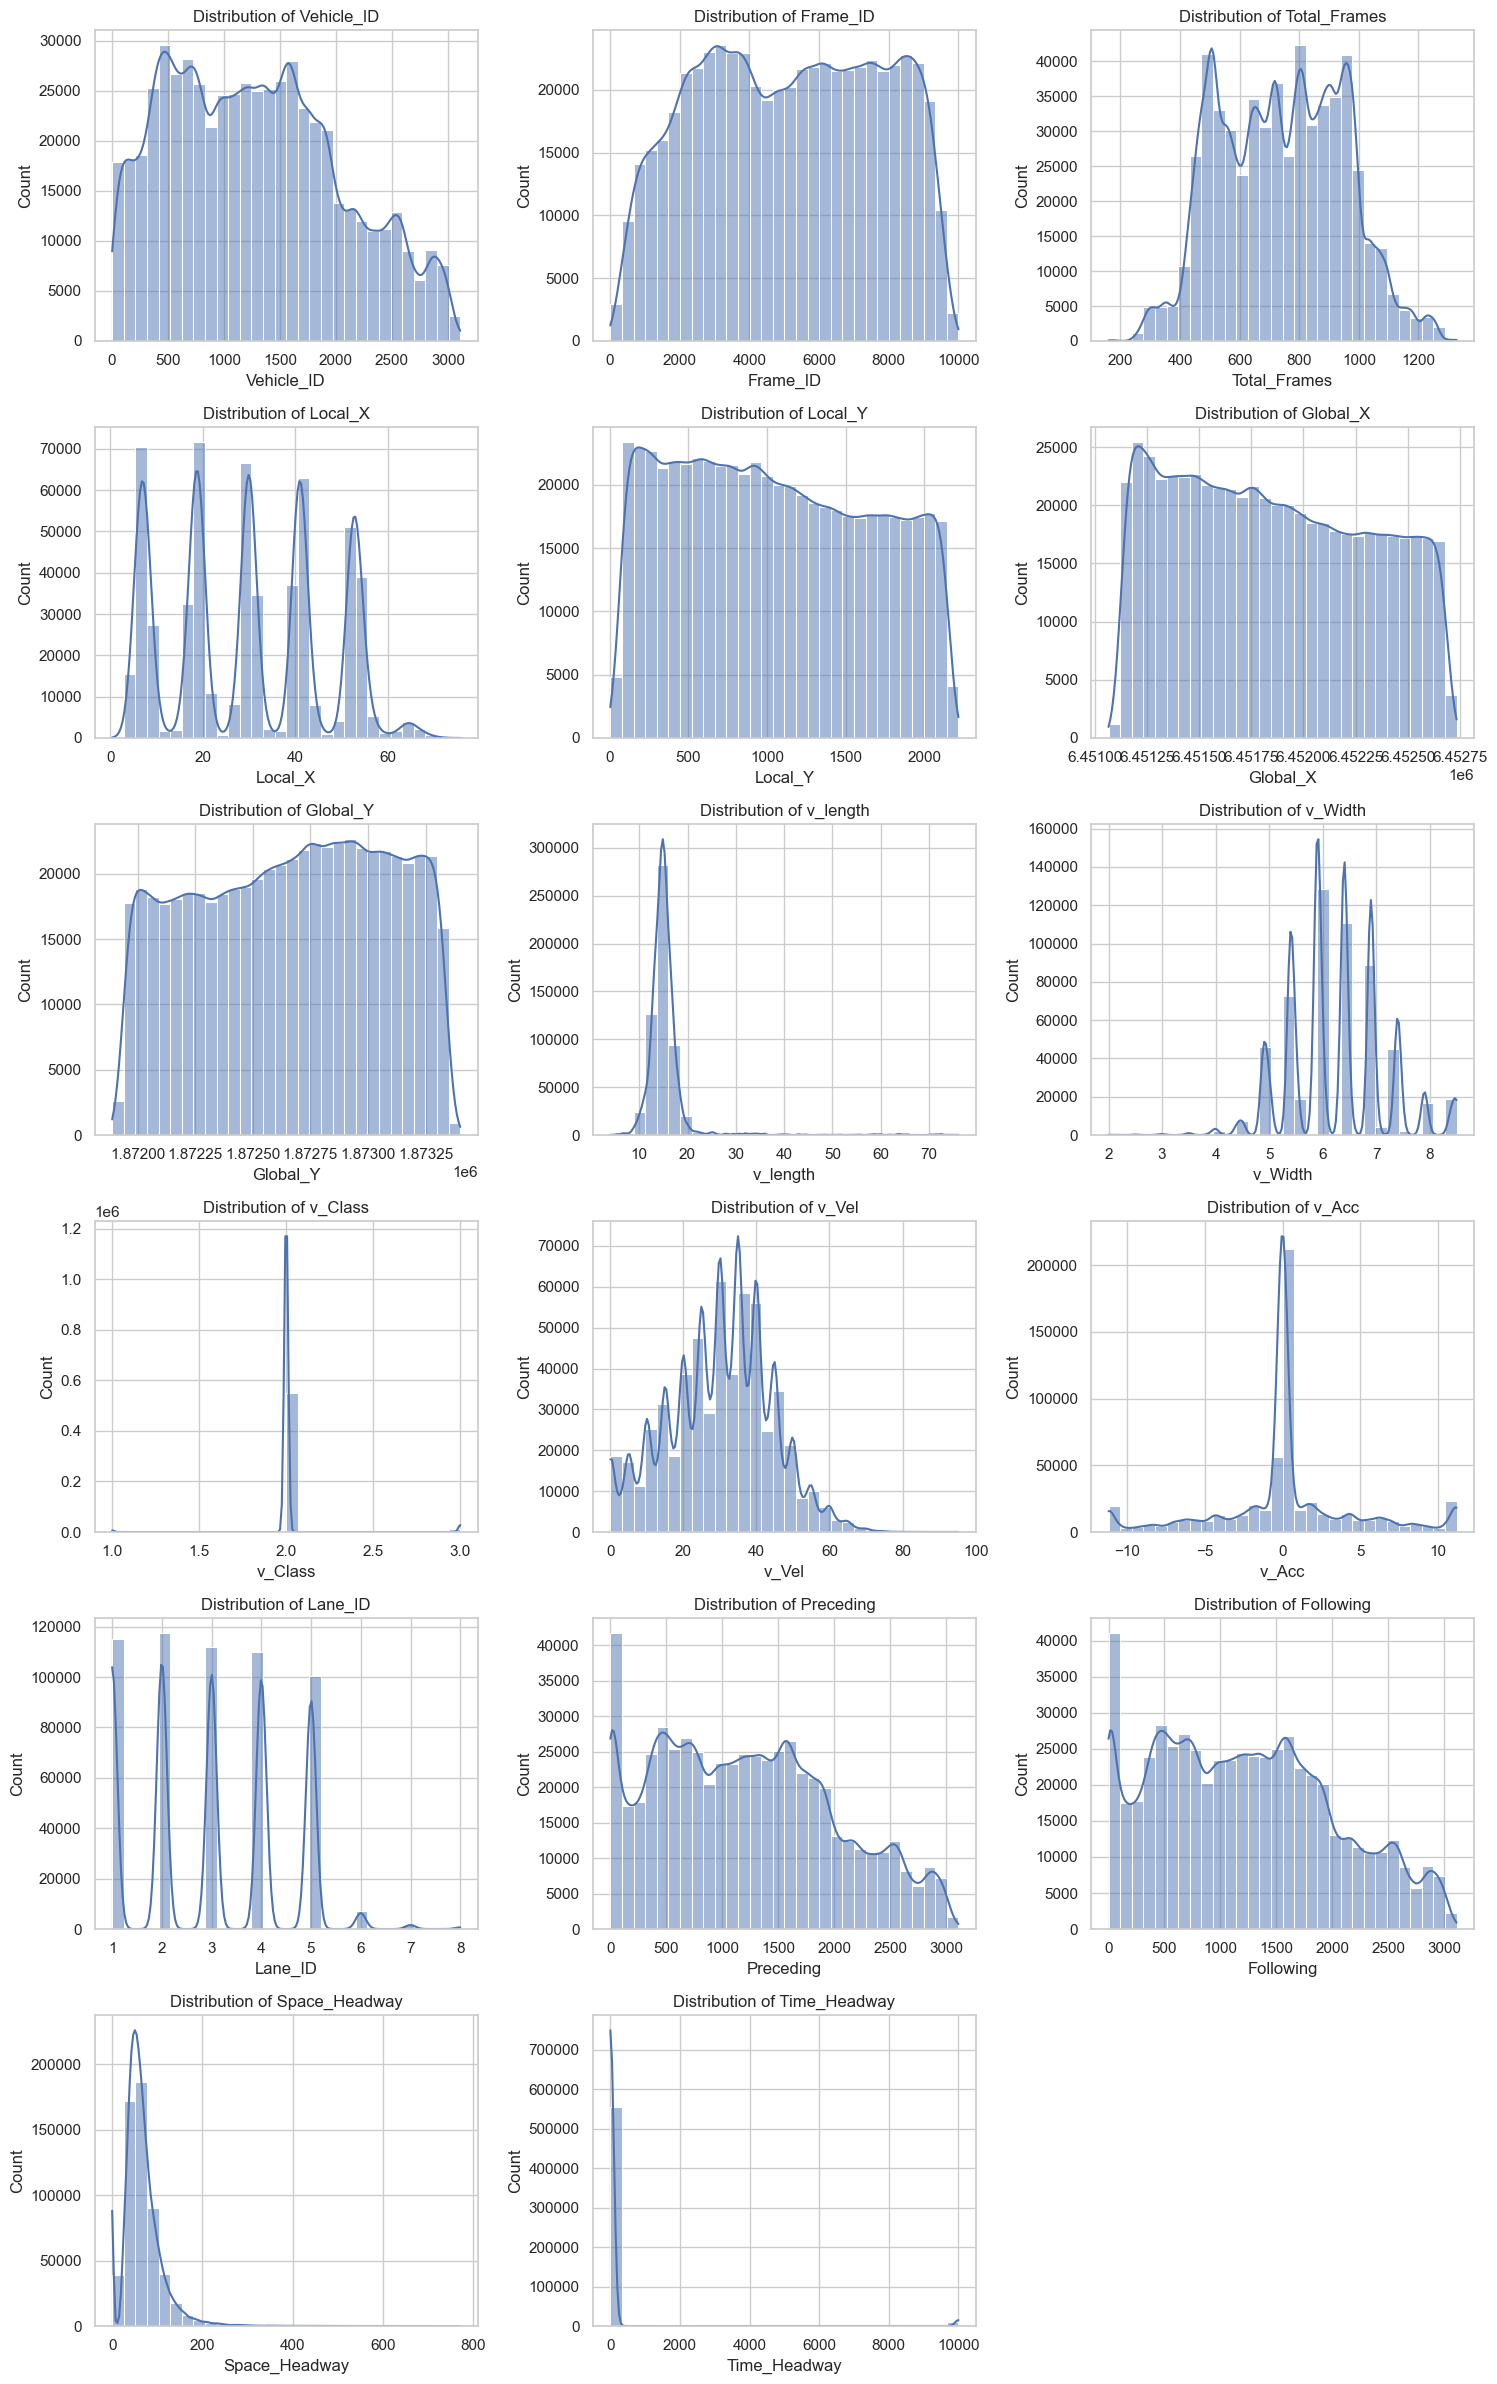

In [15]:
# Dynamically create a grid of histogram subplots based on the number of numeric columns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Plot style
sns.set(style="whitegrid")

# Select numeric columns
numeric_cols = df_us101_sorted.select_dtypes(include=[np.number]).columns.tolist()

# If there are no numeric columns, print a message and skip
if len(numeric_cols) == 0:
    print("No numeric columns available to plot histograms.")
else:
    # Compute rows/cols dynamically: fix 3 columns per row, rows = ceil(n_columns / 3)
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    # Set figure size based on number of subplots
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    # Loop through each numeric column and plot histogram
    for i, col in enumerate(numeric_cols, start=1):
        ax = plt.subplot(n_rows, n_cols, i)
        # Drop NaNs for this column to avoid affecting the histogram
        data_col = df_us101_sorted[col].dropna()

        # Histogram + KDE
        sns.histplot(data=data_col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    # Tight layout for subplots
    plt.tight_layout()

    # Save and show
    out_path = r"D:\UoM\DATA72002\Data\histograms.png"
    plt.savefig(out_path, dpi=150)
    print(f"Histograms saved to: {out_path}")
    plt.show()


In [5]:
import pandas as pd
Data= "Cleaned1_NGSIM.csv"
df = pd.read_csv(Data)

print(f"The dataset contains {df.shape[0]} rows.")


The dataset contains 564397 rows.


In [17]:
# Smooth speed and acceleration
# Use an Exponential Moving Average (EMA) filter for smoothing

# Smooth speed with span=30
df_us101_sorted['Smoothed_v_Vel'] = df_us101_sorted['v_Vel'].ewm(span=30).mean()

# Smooth acceleration with span=120
df_us101_sorted['Smoothed_v_Acc'] = df_us101_sorted['v_Acc'].ewm(span=120).mean()

# Preview the smoothed results
print("\nSmoothed Data")
print(df_us101_sorted[['Vehicle_ID', 'Global_Time', 'v_Vel', 'Smoothed_v_Vel', 'v_Acc', 'Smoothed_v_Acc']].head())

# Count missing values after smoothing
print("\nMissing Values Check After Smoothing")
print(df_us101_sorted.isnull().sum())

# Load the cleaned dataset
Data = r'D:\UoM\DATA72002\Data\Cleaned1_NGSIM.csv'
df_cleaned = pd.read_csv(Data)

# Show the number of rows
print(f"The dataset contains {df_cleaned.shape[0]} rows.")



Smoothed Data
        Vehicle_ID             Global_Time  v_Vel  Smoothed_v_Vel  v_Acc  \
768484           1 2005-06-15 08:04:29.000  19.89       19.890000    0.0   
691407           1 2005-06-15 08:04:29.200  19.89       19.890000    0.0   
899468           1 2005-06-15 08:04:29.600  20.00       19.929137    0.0   
315463           1 2005-06-15 08:04:30.500  20.00       19.948663    0.0   
838834           1 2005-06-15 08:04:31.700  20.00       19.960343    0.0   

        Smoothed_v_Acc  
768484             0.0  
691407             0.0  
899468             0.0  
315463             0.0  
838834             0.0  

Missing Values Check After Smoothing
Vehicle_ID        0
Frame_ID          0
Total_Frames      0
Global_Time       0
Local_X           0
Local_Y           0
Global_X          0
Global_Y          0
v_length          0
v_Width           0
v_Class           0
v_Vel             0
v_Acc             0
Lane_ID           0
Preceding         0
Following         0
Space_Headway     0


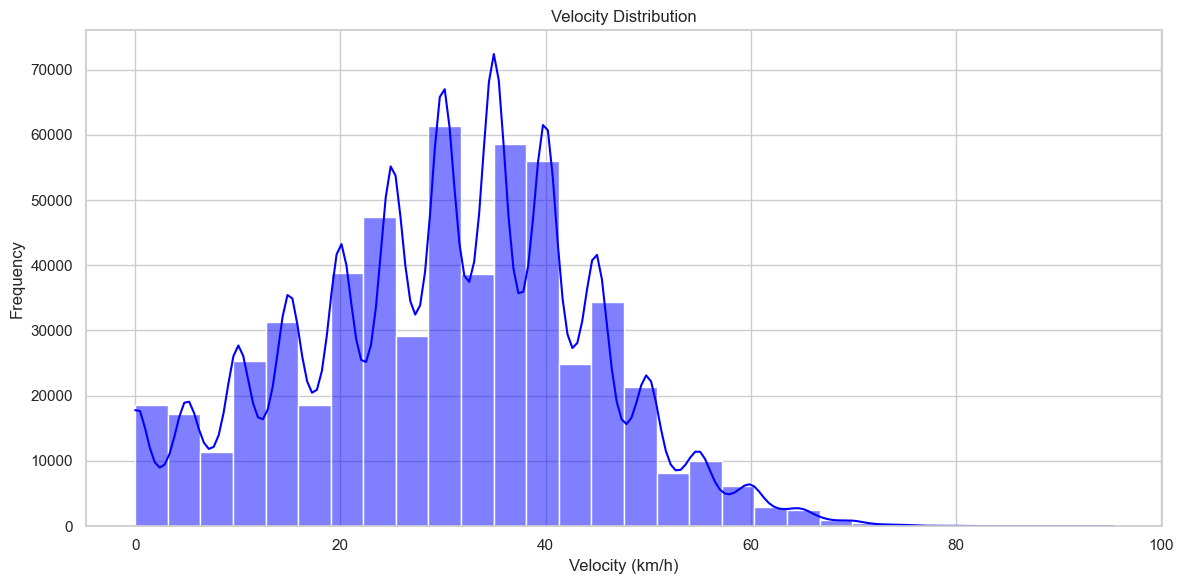

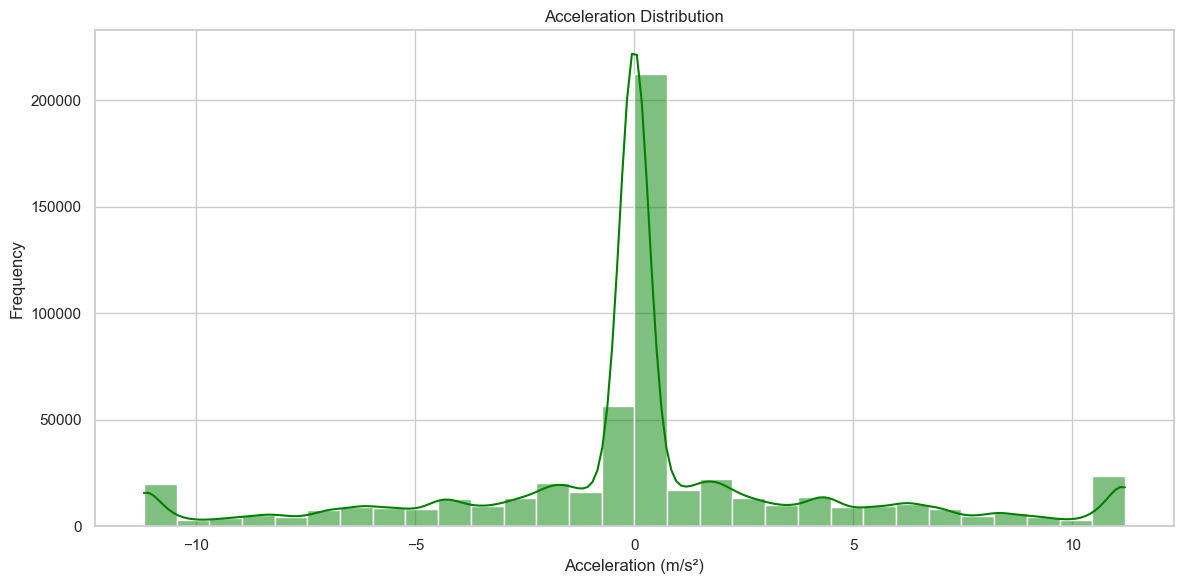

In [18]:
# Plot velocity distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Vel'].dropna(), kde=True, color='blue', bins=30)
plt.title('Velocity Distribution')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot acceleration distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Acc'].dropna(), kde=True, color='green', bins=30)
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration (m/s²)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


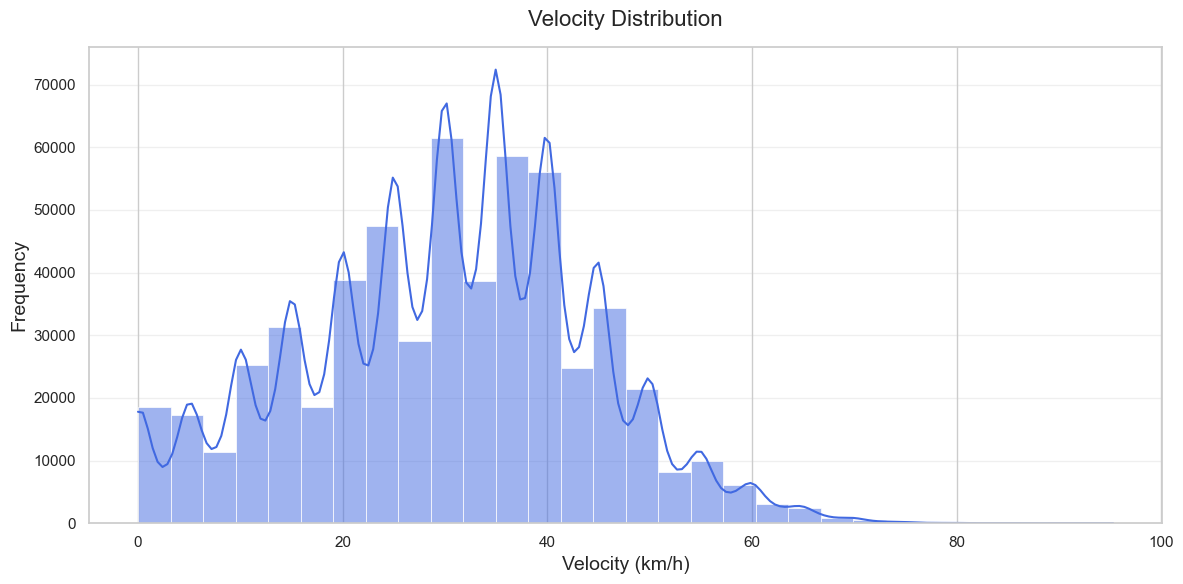

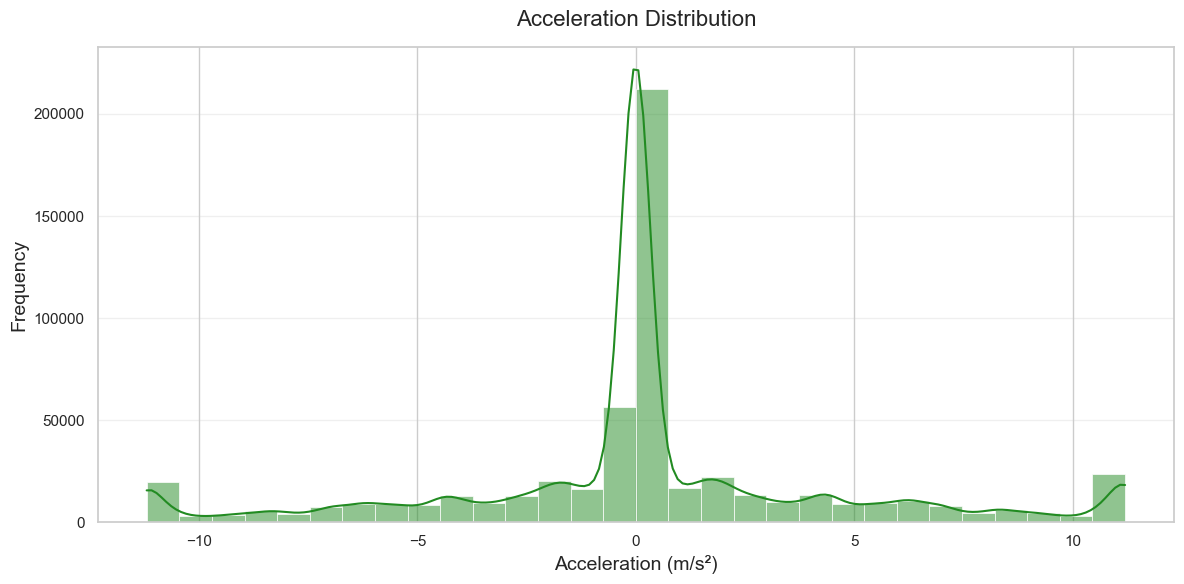

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

#  Plot velocity distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Vel'], 
             kde=True, 
             color='royalblue', 
             bins=30,
             edgecolor='white',
             linewidth=0.5)
plt.title('Velocity Distribution', fontsize=16, pad=15)
plt.xlabel('Velocity (km/h)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(r'D:\UoM\DATA72002\Data\velocity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot acceleration distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Acc'], 
             kde=True, 
             color='forestgreen', 
             bins=30,
             edgecolor='white',
             linewidth=0.5)
plt.title('Acceleration Distribution', fontsize=16, pad=15)
plt.xlabel('Acceleration (m/s²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(r'D:\UoM\DATA72002\Data\acceleration_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

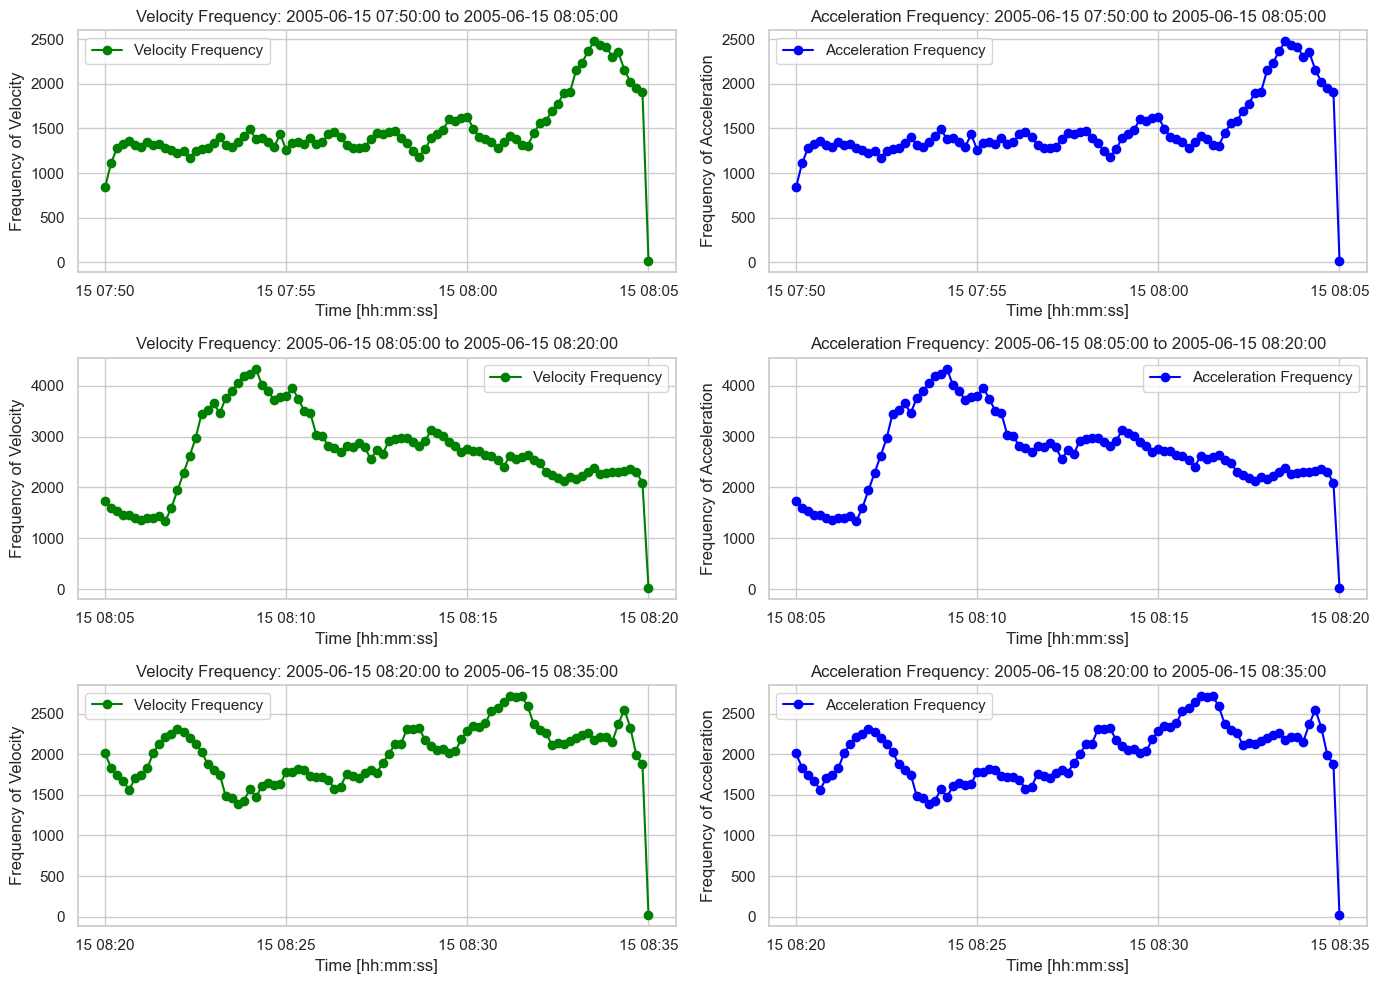

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_us101_sorted is the preprocessed data, including speed and acceleration columns
# Convert the time column to datetime format
df_us101_sorted['Global_Time'] = pd.to_datetime(df_us101_sorted['Global_Time'], unit='ms')

# Define the start and end times of three periods
time_periods = [
    ('2005-06-15 07:50:00', '2005-06-15 08:05:00'), 
    ('2005-06-15 08:05:00', '2005-06-15 08:20:00'),
    ('2005-06-15 08:20:00', '2005-06-15 08:35:00') 
]

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(14, 10))

# Iterate over each time period
for i, (start_time, end_time) in enumerate(time_periods):
    # Filter data within the period
    df_filtered = df_us101_sorted[(df_us101_sorted['Global_Time'] >= start_time) & (df_us101_sorted['Global_Time'] <= end_time)]
    
    # Set time as the index
    df_filtered.set_index('Global_Time', inplace=True)
    
    # Compute acceleration frequency every 10 seconds
    acceleration_frequency = df_filtered['v_Acc'].resample('10s').count()

    # Plot acceleration frequency
    ax[i, 1].plot(acceleration_frequency.index, acceleration_frequency.values, color='blue', marker='o', linestyle='-', label='Acceleration Frequency')
    ax[i, 1].set_title(f'Acceleration Frequency: {start_time} to {end_time}')
    ax[i, 1].set_xlabel('Time [hh:mm:ss]')
    ax[i, 1].set_ylabel('Frequency of Acceleration')
    ax[i, 1].legend()

    # Compute velocity frequency every 10 seconds
    velocity_frequency = df_filtered['v_Vel'].resample('10s').count()

    # Plot velocity frequency
    ax[i, 0].plot(velocity_frequency.index, velocity_frequency.values, color='green', marker='o', linestyle='-', label='Velocity Frequency')
    ax[i, 0].set_title(f'Velocity Frequency: {start_time} to {end_time}')
    ax[i, 0].set_xlabel('Time [hh:mm:ss]')
    ax[i, 0].set_ylabel('Frequency of Velocity')
    ax[i, 0].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('velocity_acceleration_frequency_comparison.png')
plt.show()


1. Abnormal driving

1.1 emergency brake

XGBoost


OOF Accuracy (5-fold): 0.817458

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       0.70      0.14      0.23    100669
Moderate Brake       0.25      0.00      0.00     10885
      No Brake       0.82      0.99      0.90    452843

      accuracy                           0.82    564397
     macro avg       0.59      0.38      0.38    564397
  weighted avg       0.79      0.82      0.76    564397



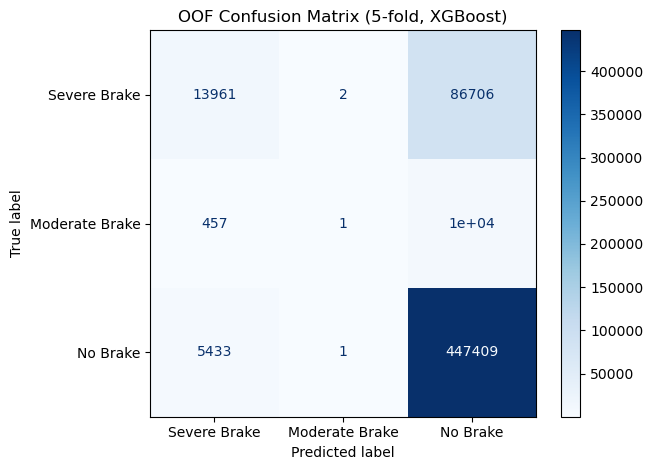


Results saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.


In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Load data
Data= "Cleaned1_NGSIM.csv"
df = pd.read_csv(Data)

# Define the braking-level classification function (label generation)
def classify_brake(row):
    if row['v_Class'] == 1:  # Motorcycle
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # Car
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # Truck
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

# Generate labels
df['brake_level'] = df.apply(classify_brake, axis=1)
y = df['brake_level'].map({'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0})

# Features (remove the Global_Time column)
features = ['v_Vel', 'Space_Headway', 'Global_Time','Time_Headway','Local_X','Local_Y']

df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')
df['Global_Time'] = df['Global_Time'].astype(np.int64) // 10**9  # Convert to seconds

X = df[features].fillna(0)

# OOF (out-of-fold) predictions via cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_pred = pd.Series(index=y.index, dtype=int)

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# OOF overall evaluation
label_order = [2, 1, 0]
name_map = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}

oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (5-fold, XGBoost)")
plt.tight_layout()
plt.show()

# Save predictions
df['predicted_brake_level'] = oof_pred.values
df['predicted_brake_level_name'] = df['predicted_brake_level'].map(name_map)

df.to_csv('Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv', index=False)
print("\nResults saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.")



OOF Accuracy (5-fold): 0.996634

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       1.00      0.99      1.00    100669
Moderate Brake       0.92      0.94      0.93     10885
      No Brake       1.00      1.00      1.00    452843

      accuracy                           1.00    564397
     macro avg       0.97      0.98      0.97    564397
  weighted avg       1.00      1.00      1.00    564397



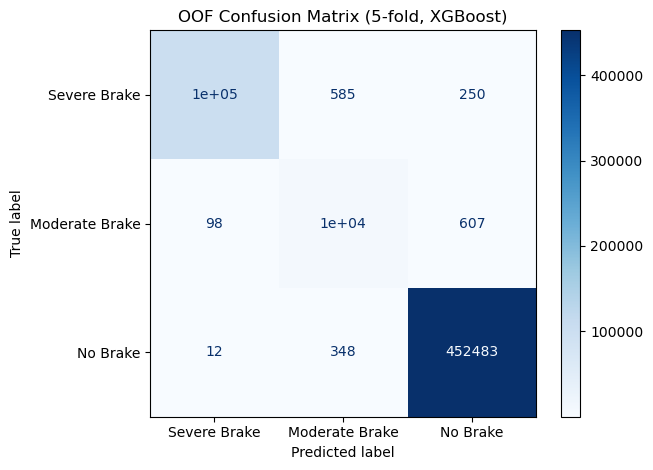


Results saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.


In [7]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Load data
Data= "Cleaned1_NGSIM.csv"
df = pd.read_csv(Data)

# Define the braking-level classification function (label generation)
def classify_brake(row):
    if row['v_Class'] == 1:  # Motorcycle
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # Car
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # Truck
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

# Generate labels
df['brake_level'] = df.apply(classify_brake, axis=1)
y = df['brake_level'].map({'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0})

# Features
features = ['v_Vel', 'Space_Headway', 'v_Acc', 'Global_Time','Time_Headway','Local_X','Local_Y']

# If Global_Time is needed, convert it to numeric
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')
df['Global_Time'] = df['Global_Time'].astype(np.int64) // 10**9  # Convert to seconds

X = df[features].fillna(0)

# OOF (out-of-fold) prediction via cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_pred = pd.Series(index=y.index, dtype=int)

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

#OOF overall evaluation
label_order = [2, 1, 0]
name_map = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}

oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (5-fold, XGBoost)")
plt.tight_layout()
plt.show()

#Save prediction results
df['predicted_brake_level'] = oof_pred.values
df['predicted_brake_level_name'] = df['predicted_brake_level'].map(name_map)

df.to_csv('Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv', index=False)
print("\nResults saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.")


In [20]:
# Count predictions per braking class
predicted_counts = oof_pred.value_counts().reindex(label_order, fill_value=0)

print("\nPredicted Brake Level Counts:")
for label, count in predicted_counts.items():
    print(f"{name_map[label]}: {count} samples")

# Save prediction results
df['predicted_brake_level'] = oof_pred.values
df['predicted_brake_level_name'] = df['predicted_brake_level'].map(name_map)

# Save to CSV file
save_path = 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'
df.to_csv(save_path, index=False)
print(f"\nResults saved to: {save_path}")



Predicted Brake Level Counts:
Severe Brake: 99944 samples
Moderate Brake: 11113 samples
No Brake: 453340 samples

Results saved to: Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv


Decision Tree


OOF Accuracy (GroupKFold, 5-fold): 0.803404

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       0.53      0.03      0.06    100669
Moderate Brake       0.60      0.01      0.02     10885
      No Brake       0.81      0.99      0.89    452843

      accuracy                           0.80    564397
     macro avg       0.65      0.35      0.32    564397
  weighted avg       0.75      0.80      0.73    564397



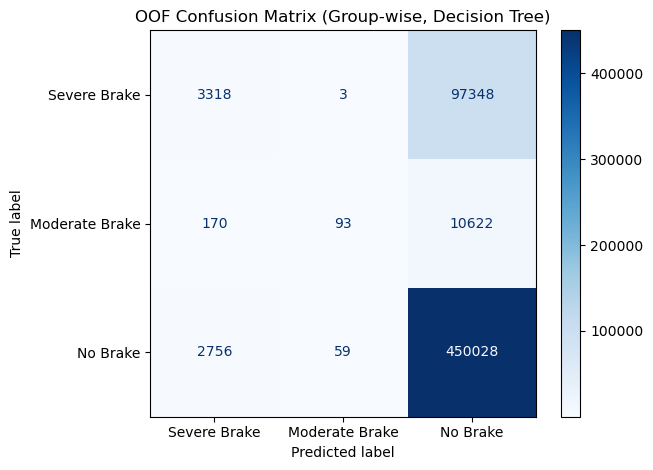


Brake Level Counts (OOF predictions):
predicted_brake_level
2      6244
1       155
0    557998
Name: count, dtype: int64


In [13]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Load data 
Data= "Cleaned1_NGSIM.csv"
df = pd.read_csv(Data)

# Build labels
def classify_brake(row):
    if row['v_Class'] == 1:  # Motorcycle
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # Car
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # Truck
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

df['brake_level'] = df.apply(classify_brake, axis=1)

# Select features 
features = ['v_Vel', 'Space_Headway', 'Time_Headway','Local_X','Local_Y']  # Use only these three features
need_cols = features + ['Vehicle_ID', 'brake_level']
missing = [c for c in need_cols if c not in df.columns]
assert not missing, f": {missing}"

# Clean missing values
df_clean = df[need_cols].copy()
df_clean = df_clean.dropna(subset=need_cols)

# Label encoding: 2=Severe, 1=Moderate, 0=No
label_map = {'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0}
name_map  = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}
df_clean = df_clean[df_clean['brake_level'].isin(label_map.keys())].copy()
df_clean['label'] = df_clean['brake_level'].map(label_map)

X = df_clean[features].reset_index(drop=True)
y = df_clean['label'].reset_index(drop=True)
groups = df_clean['Vehicle_ID'].reset_index(drop=True)

# OOF (grouped by vehicle to prevent same-vehicle leakage) 
gkf = GroupKFold(n_splits=5)
oof_pred = pd.Series(index=y.index, dtype=int)

# Add regularization to the decision tree to prevent overfitting
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # or 2/1 to further constrain
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# Evaluation 
label_order = [2, 1, 0]  # Severe → Moderate → No
oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

#Save OOF predictions
df_out = df_clean.copy()
df_out['predicted_brake_level'] = oof_pred.values
df_out['predicted_brake_level_name'] = df_out['predicted_brake_level'].map(name_map)

# Summarize distribution
counts = df_out['predicted_brake_level'].value_counts().reindex(label_order, fill_value=0)
print("\nBrake Level Counts (OOF predictions):")
print(counts)



OOF Accuracy (GroupKFold, 5-fold): 0.998602

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       1.00      1.00      1.00    100669
Moderate Brake       0.98      0.98      0.98     10885
      No Brake       1.00      1.00      1.00    452843

      accuracy                           1.00    564397
     macro avg       0.99      0.99      0.99    564397
  weighted avg       1.00      1.00      1.00    564397



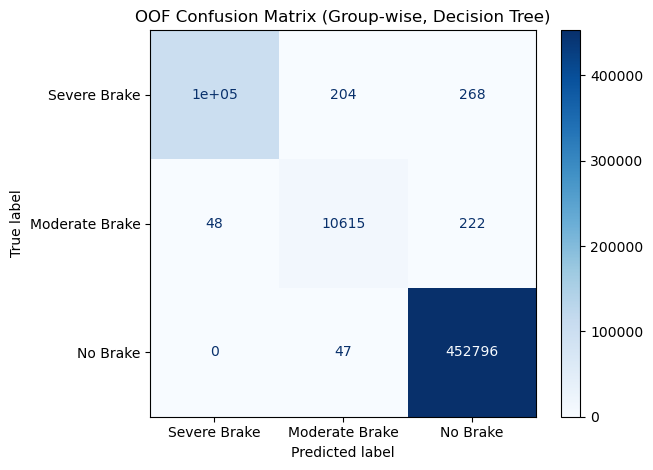


Brake Level Counts (OOF predictions):
predicted_brake_level
2    100245
1     10866
0    453286
Name: count, dtype: int64

Results saved to: 1Jisha.csv


In [16]:
#coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Load data
Data= "Cleaned1_NGSIM.csv"
df = pd.read_csv(Data)

# Build labels
def classify_brake(row):
    if row['v_Class'] == 1:  # Motorcycle
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # Car
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # Truck
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

df['brake_level'] = df.apply(classify_brake, axis=1)

# Select features
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y']  # Only use these features
need_cols = features + ['Vehicle_ID', 'brake_level']
missing = [c for c in need_cols if c not in df.columns]
assert not missing, f"Missing required columns: {missing}"

# Clean missing values
df_clean = df[need_cols].copy()
df_clean = df_clean.dropna(subset=need_cols)

# Label encoding: 2=Severe, 1=Moderate, 0=No
label_map = {'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0}
name_map  = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}
df_clean = df_clean[df_clean['brake_level'].isin(label_map.keys())].copy()
df_clean['label'] = df_clean['brake_level'].map(label_map)

X = df_clean[features].reset_index(drop=True)
y = df_clean['label'].reset_index(drop=True)
groups = df_clean['Vehicle_ID'].reset_index(drop=True)

# OOF (grouped by vehicle to prevent same-vehicle leakage)
gkf = GroupKFold(n_splits=5)
oof_pred = pd.Series(index=y.index, dtype=int)

# Decision tree with regularization to prevent overfitting
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # or 2/1 to further restrict
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# Evaluation
label_order = [2, 1, 0]  # Severe → Moderate → No
oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# Save OOF predictions
# Load Cleaned_NGSIM data
df_cleaned = pd.read_csv('Cleaned1_NGSIM.csv')

# Merge predictions into Cleaned_NGSIM data
df_cleaned['predicted_brake_level'] = oof_pred.values
df_cleaned['predicted_brake_level_name'] = df_cleaned['predicted_brake_level'].map(name_map)

# Distribution statistics
counts = df_cleaned['predicted_brake_level'].value_counts().reindex(label_order, fill_value=0)
print("\nBrake Level Counts (OOF predictions):")
print(counts)

# Save final results to 1Jisha.csv
save_path = '1Jisha.csv'
df_cleaned.to_csv(save_path, index=False)
print(f"\nResults saved to: {save_path}")


政策

In [17]:
import pandas as pd

# 1) Load data
Data= "Cleaned1_NGSIM.csv"
df = pd.read_csv(Data)

# 2) Define government-defined emergency braking classification function (label generation)
def classify_brake(row):
    if row['v_Class'] == 1:  # Motorcycle
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # Car
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # Truck
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

# Generate labels
df['brake_level'] = df.apply(classify_brake, axis=1)

# Label encoding: 2=Severe, 1=Moderate, 0=No
label_map = {'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0}
name_map  = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}

df['label'] = df['brake_level'].map(label_map)

# 3) Count the number of each brake type
brake_counts = df['brake_level'].value_counts().reindex(['Severe Brake', 'Moderate Brake', 'No Brake'], fill_value=0)
print("\nBrake type statistics:")
print(brake_counts)

# 4) Save results to Jisha.csv
df_out = df.copy()
df_out['predicted_brake_level'] = df_out['label']
df_out['predicted_brake_level_name'] = df_out['predicted_brake_level'].map(name_map)

# Save file
save_path = 'Jisha.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")



Brake type statistics:
brake_level
Severe Brake      100669
Moderate Brake     10885
No Brake          452843
Name: count, dtype: int64

Results saved to: Jisha.csv


1.2 Sinuous Driving

In [18]:
import pandas as pd

# Load data
file_path = 'Cleaned1_NGSIM.csv'
df = pd.read_csv(file_path)

# Check if there are infinite values in each column
inf_values = df.isin([float('inf'), -float('inf')])

# Output the number of infinite values
inf_counts = inf_values.sum()  # Count the number of infinite values per column
print("\nInf values count per column:")
print(inf_counts)

# Check infinite values in the 'v_Acc' column
inf_in_v_acc = df['v_Acc'].isin([float('inf'), -float('inf')]).sum()
print(f"\nNumber of infinite values in 'v_Acc': {inf_in_v_acc}")



Inf values count per column:
Vehicle_ID       0
Frame_ID         0
Total_Frames     0
Global_Time      0
Local_X          0
Local_Y          0
Global_X         0
Global_Y         0
v_length         0
v_Width          0
v_Class          0
v_Vel            0
v_Acc            0
Lane_ID          0
Preceding        0
Following        0
Space_Headway    0
Time_Headway     0
Location         0
dtype: int64

Number of infinite values in 'v_Acc': 0


In [19]:
import pandas as pd

# Load data
file_path = 'Cleaned1_NGSIM.csv'
df = pd.read_csv(file_path)

# Check the maximum and minimum values of each column
max_values = df.max()
min_values = df.min()

print("\nMaximum values in each column:")
print(max_values)

print("\nMinimum values in each column:")
print(min_values)

# Check for missing values (NaN)
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)



Maximum values in each column:
Vehicle_ID                          3109
Frame_ID                           10000
Total_Frames                        1328
Global_Time      2005-06-15 08:35:52.100
Local_X                           75.682
Local_Y                         2217.411
Global_X                     6452733.024
Global_Y                     1873400.601
v_length                            76.1
v_Width                              8.5
v_Class                                3
v_Vel                               95.3
v_Acc                               11.2
Lane_ID                                8
Preceding                           3109
Following                           3109
Space_Headway                     771.16
Time_Headway                     9999.99
Location                          us-101
dtype: object

Minimum values in each column:
Vehicle_ID                             1
Frame_ID                              10
Total_Frames                         160
Global_Time      200

XGBoost

C:\Users\13193\AppData\Local\Temp\ipykernel_15916\3103517422.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)



OOF Accuracy (GroupKFold, 5-fold): 0.990808

              precision    recall  f1-score   support

 Non-Sinuous       0.99      1.00      1.00    559046
     Sinuous       0.67      0.06      0.11      5351

    accuracy                           0.99    564397
   macro avg       0.83      0.53      0.55    564397
weighted avg       0.99      0.99      0.99    564397



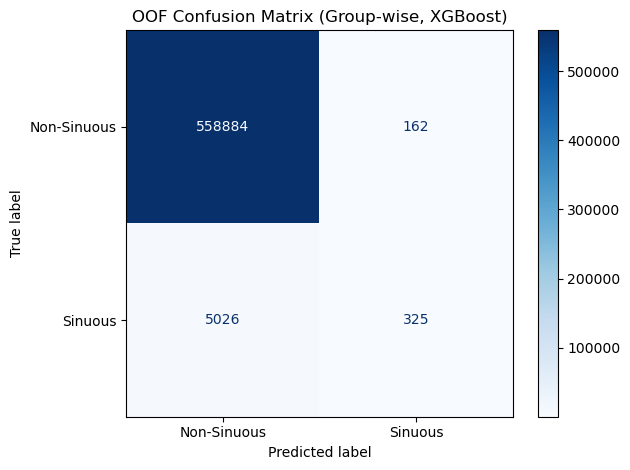

Total sinuous driving (OOF, is_sinuous=1): 487
Total non-sinuous driving (OOF, is_sinuous=0): 563910


In [20]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = '1Jisha.csv'
df = pd.read_csv(file_path)

# Ensure Global_Time column is in datetime format
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

# Calculate local coordinate changes for each frame (group by Vehicle_ID)
def calculate_delta(group):
    group['delta_X'] = group['Local_X'].diff()                   
    group['delta_Y'] = group['Local_Y'].diff()                     
    group['delta_time'] = group['Global_Time'].diff().dt.total_seconds()  
    return group

df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)

# Calculate ratio of lateral/longitudinal changes
df['ratio_X_Y'] = df['delta_X'].abs() / df['delta_Y'].abs()
df['ratio_X_Y'] = df['ratio_X_Y'].replace([np.inf, -np.inf], 0)

# Fill missing values
df = df.fillna(0)

# Construct labels
threshold_delta_X = 5.0    
threshold_time    = 0.5    
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# Features and labels
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc']
X = df[features].reset_index(drop=True)
y = df['is_sinuous'].astype(int).reset_index(drop=True)

# OOF (grouped by vehicle to prevent information leakage within the same vehicle)
groups = df['Vehicle_ID'].reset_index(drop=True) 
gkf = GroupKFold(n_splits=5)

oof_pred = np.zeros(len(y), dtype=int)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    # Standardization within each fold to avoid information leakage
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_va_scaled = scaler.transform(X_va)

    # XGBoost binary classification model (use probability threshold 0.5 to classify)
    model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_tr_scaled, y_tr)

    va_proba = model.predict_proba(X_va_scaled)[:, 1]
    oof_pred[va_idx] = (va_proba >= 0.5).astype(int)

# OOF evaluation
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {accuracy_score(y, oof_pred):.6f}\n")
print(classification_report(y, oof_pred, labels=[0,1], target_names=['Non-Sinuous','Sinuous']))

cm_oof = confusion_matrix(y, oof_pred, labels=[0,1])
ConfusionMatrixDisplay(confusion_matrix=cm_oof, display_labels=['Non-Sinuous','Sinuous']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, XGBoost)")
plt.tight_layout()
plt.show()

# Count overall predictions using OOF
sinuous_all_count = int((oof_pred == 1).sum())
non_sinuous_all_count = int((oof_pred == 0).sum())
print(f"Total sinuous driving (OOF, is_sinuous=1): {sinuous_all_count}")
print(f"Total non-sinuous driving (OOF, is_sinuous=0): {non_sinuous_all_count}")

# Save results
df_out = df.copy()
df_out['is_sinuous_oof_pred'] = oof_pred



Decision Tree

C:\Users\13193\AppData\Local\Temp\ipykernel_15916\3375634887.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)



OOF Accuracy (GroupKFold, 5-fold): 0.990792

              precision    recall  f1-score   support

 Non-Sinuous       0.99      1.00      1.00    559046
     Sinuous       0.68      0.06      0.10      5351

    accuracy                           0.99    564397
   macro avg       0.83      0.53      0.55    564397
weighted avg       0.99      0.99      0.99    564397



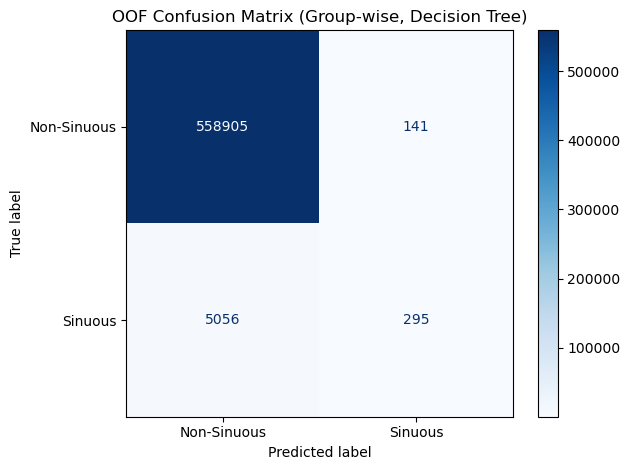

Total sinuous driving (OOF, is_sinuous=1): 436
Total non-sinuous driving (OOF, is_sinuous=0): 563961


In [21]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = '1Jisha.csv'
df = pd.read_csv(file_path)

# Ensure Global_Time column is datetime type
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

# Calculate local coordinate changes per frame: grouped by Vehicle_ID
def calculate_delta(group):
    group['delta_X'] = group['Local_X'].diff()                    
    group['delta_Y'] = group['Local_Y'].diff()                    
    group['delta_time'] = group['Global_Time'].diff().dt.total_seconds()
    return group

df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)

# Calculate ratio of lateral/longitudinal changes
df['ratio_X_Y'] = df['delta_X'].abs() / df['delta_Y'].abs()
df['ratio_X_Y'] = df['ratio_X_Y'].replace([np.inf, -np.inf], 0)

# Fill missing values
df = df.fillna(0)

# Construct labels
threshold_delta_X = 5.0      # feet
threshold_time    = 0.5      # seconds
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# Features and labels
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc']
X = df[features].reset_index(drop=True)
y = df['is_sinuous'].astype(int).reset_index(drop=True)

# OOF (grouped by vehicle to prevent leakage within the same vehicle)
groups = df['Vehicle_ID'].reset_index(drop=True)   # Grouping key: Vehicle_ID
gkf = GroupKFold(n_splits=5)

oof_pred = np.zeros(len(y), dtype=int)

# Decision tree with regularization to prevent overfitting
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # can further restrict features
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred[va_idx] = model.predict(X_va)

# OOF overall evaluation
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {accuracy_score(y, oof_pred):.6f}\n")
print(classification_report(y, oof_pred, labels=[0,1], target_names=['Non-Sinuous','Sinuous']))

cm_oof = confusion_matrix(y, oof_pred, labels=[0,1])
ConfusionMatrixDisplay(cm_oof, display_labels=['Non-Sinuous','Sinuous']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# Use OOF predictions to count overall numbers 
sinuous_all_count = int((oof_pred == 1).sum())
non_sinuous_all_count = int((oof_pred == 0).sum())
print(f"Total sinuous driving (OOF, is_sinuous=1): {sinuous_all_count}")
print(f"Total non-sinuous driving (OOF, is_sinuous=0): {non_sinuous_all_count}")

df_out = df.copy()
df_out['is_sinuous_oof_pred'] = oof_pred


In [22]:
sinuous_count = (oof_pred == 1).sum() 
non_sinuous_count = (oof_pred == 0).sum()  

print(f"\nOOF，is_sinuous=1: {sinuous_count}")
print(f"OOF，is_sinuous=0: {non_sinuous_count}")



OOF，is_sinuous=1: 436
OOF，is_sinuous=0: 563961



OOF Accuracy (GroupKFold, 5-fold): 0.999996

              precision    recall  f1-score   support

 Non-Sinuous       1.00      1.00      1.00    559046
     Sinuous       1.00      1.00      1.00      5351

    accuracy                           1.00    564397
   macro avg       1.00      1.00      1.00    564397
weighted avg       1.00      1.00      1.00    564397



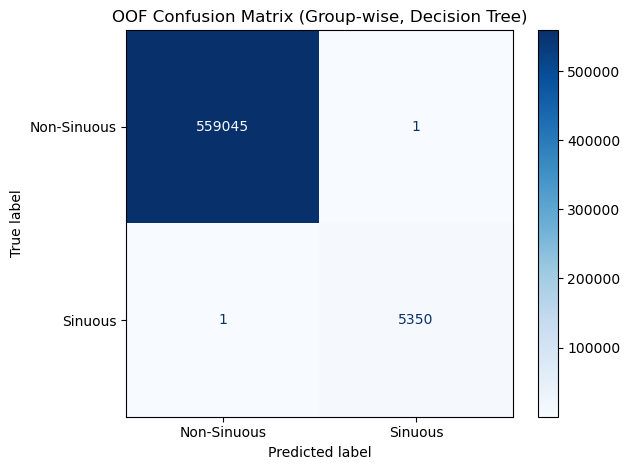

Total sinuous driving (OOF, is_sinuous=1): 5351
Total non-sinuous driving (OOF, is_sinuous=0): 559046


In [26]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = '1Jisha.csv'
df = pd.read_csv(file_path)

# Ensure Global_Time column is in datetime format
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')


df = df.sort_values(['Vehicle_ID', 'Global_Time']).copy()

# per-vehicle frame-to-frame deltas
df['delta_X'] = df.groupby('Vehicle_ID')['Local_X'].diff()
df['delta_Y'] = df.groupby('Vehicle_ID')['Local_Y'].diff()
df['delta_time'] = df.groupby('Vehicle_ID')['Global_Time'].diff().dt.total_seconds()

# ratio of lateral/longitudinal changes (robust to 0/NaN)
den = df['delta_Y'].abs().replace(0, np.nan)
df['ratio_X_Y'] = (df['delta_X'].abs() / den).fillna(0)

# Fill missing values produced by first row of each group, etc.
df = df.fillna(0)

# Construct labels 
threshold_delta_X = 5.0      # feet
threshold_time    = 0.5      # seconds
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# Features and labels
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc','delta_X', 'delta_Y', 'delta_time', 'ratio_X_Y']
X = df[features].reset_index(drop=True)
y = df['is_sinuous'].astype(int).reset_index(drop=True)

# OOF (grouped by vehicle, prevent leakage from the same vehicle)
groups = df['Vehicle_ID'].reset_index(drop=True)   # Grouping key: Vehicle_ID
gkf = GroupKFold(n_splits=5)

oof_pred = np.zeros(len(y), dtype=int)

# Decision tree with regularization to prevent overfitting
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # can further restrict features
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred[va_idx] = model.predict(X_va)

# OOF overall evaluation
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {accuracy_score(y, oof_pred):.6f}\n")
print(classification_report(y, oof_pred, labels=[0,1], target_names=['Non-Sinuous','Sinuous']))

cm_oof = confusion_matrix(y, oof_pred, labels=[0,1])
ConfusionMatrixDisplay(cm_oof, display_labels=['Non-Sinuous','Sinuous']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# Use OOF predictions to count overall numbers
sinuous_all_count = int((oof_pred == 1).sum())
non_sinuous_all_count = int((oof_pred == 0).sum())
print(f"Total sinuous driving (OOF, is_sinuous=1): {sinuous_all_count}")
print(f"Total non-sinuous driving (OOF, is_sinuous=0): {non_sinuous_all_count}")


df_out = df.copy()
df_out['is_sinuous_oof_pred'] = oof_pred


Government Policy

In [27]:
import pandas as pd
import numpy as np

# Load data
file_path = '1Jisha.csv'
df = pd.read_csv(file_path)

# Ensure Global_Time column is datetime
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

df = df.sort_values(['Vehicle_ID', 'Global_Time']).copy()

# Per-vehicle deltas
df['delta_X'] = df.groupby('Vehicle_ID')['Local_X'].diff()
df['delta_Y'] = df.groupby('Vehicle_ID')['Local_Y'].diff()
df['delta_time'] = df.groupby('Vehicle_ID')['Global_Time'].diff().dt.total_seconds()

# Ratio
den = df['delta_Y'].abs().replace(0, np.nan)
df['ratio_X_Y'] = (df['delta_X'].abs() / den).fillna(0)

# Fill missing
df = df.fillna(0)

# Construct labels (based on government criteria)
threshold_delta_X = 5.0    
threshold_time    = 0.5     
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# Output predicted result
df['predicted_sinuous'] = df['is_sinuous'].map({True: 'Sinuous', False: 'Non-Sinuous'})

# Count
sinuous_count = df['predicted_sinuous'].value_counts()
print(f"Predicted number of snake-like driving categories:\n{sinuous_count}")

# Save
df.to_csv('2Shexingjiashi.csv', index=False)
print("Saved as 2Shexingjiashi.csv")


Predicted number of snake-like driving categories:
predicted_sinuous
Non-Sinuous    559046
Sinuous          5351
Name: count, dtype: int64
Saved as 2Shexingjiashi.csv


1.3 Dangerous Lane Changes

XGBoost

Fold 1/5 accuracy: 0.9459
Fold 2/5 accuracy: 0.9443
Fold 3/5 accuracy: 0.9439
Fold 4/5 accuracy: 0.9443
Fold 5/5 accuracy: 0.9428
--------------------------------------------------
CV mean accuracy (per-fold): 0.9442
OOF overall accuracy: 0.9442
OOF ROC-AUC: 0.9602
Classification Report：
               precision    recall  f1-score   support

Non-Dangerous       1.00      0.95      0.97    558923
    Dangerous       0.13      0.83      0.22      5474

     accuracy                           0.94    564397
    macro avg       0.56      0.89      0.60    564397
 weighted avg       0.99      0.94      0.96    564397



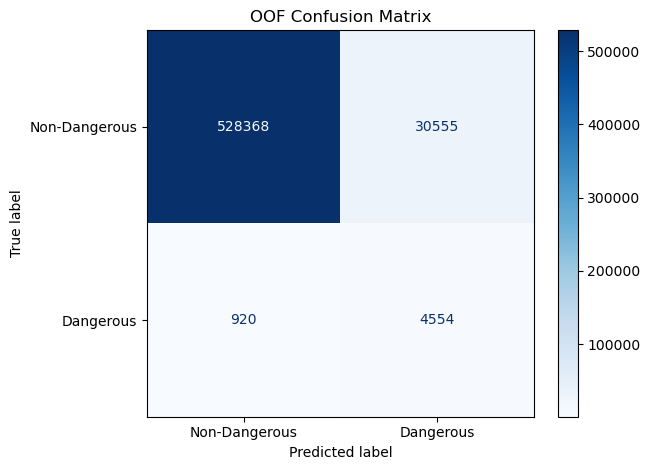

dangerous_lane_changes: 5474
non_dangerous_lane_changes: 558923
predicted_dangerous: 35109
predicted_non_dangerous: 529288


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
import xgboost as xgb

# 1) Load data and build features
file_path = '2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# Sort and compute delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# Label: whether it's a dangerous lane change
threshold_velocity_change = 10.0  # feet/second
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# Features and labels
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features].fillna(0.0).values  # defensive handling of NaNs
y = df['is_dangerous_lane_change'].astype(int).values

# Whether to group CV by vehicle (recommended True to avoid same-vehicle leakage across folds)
USE_GROUP_KFOLD = True

# 2) OOF setup
n_splits = 5
if USE_GROUP_KFOLD:
    splitter = GroupKFold(n_splits=n_splits)
    groups = df['Vehicle_ID'].values
    split_iter = splitter.split(X, y, groups=groups)
else:
    splitter = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    split_iter = splitter.split(X, y)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

def make_model(pos_weight: float):
    clf = xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        scale_pos_weight=pos_weight,
        eval_metric='logloss',
        tree_method='hist' 
    )
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

# Train/validate per fold (produce OOF)
for fold, (tr_idx, va_idx) in enumerate(split_iter, start=1):
    y_tr = y[tr_idx]
    pos = max(y_tr.sum(), 1)  # avoid division by zero
    neg = max(len(y_tr) - pos, 1)
    spw = neg / pos

    model = make_model(spw)
    model.fit(X[tr_idx], y_tr)

    proba = model.predict_proba(X[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# Overall evaluation based on OOF
oof_acc = accuracy_score(y, oof_pred)
print(f'OOF overall accuracy: {oof_acc:.4f}')

try:
    oof_auc = roc_auc_score(y, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('The ROC-AUC cannot be calculated (possibly due to an extremely unbalanced distribution between the positive and negative classes)。')

print('Classification Report：')
print(classification_report(y, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# Confusion matrix (OOF)
ConfusionMatrixDisplay.from_predictions(
    y_true=y,
    y_pred=oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# 5) Count samples
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f"dangerous_lane_changes: {dangerous_lane_changes}")
print(f"non_dangerous_lane_changes: {non_dangerous_lane_changes}")


pos_all = max(y.sum(), 1)
neg_all = max(len(y) - pos_all, 1)
final_model = make_model(neg_all / pos_all).fit(X, y)


# Count predicted dangerous and non-dangerous lane changes
predicted_dangerous = int((oof_pred == 1).sum()) 
predicted_non_dangerous = int((oof_pred == 0).sum())  

print(f"predicted_dangerous: {predicted_dangerous}")
print(f"predicted_non_dangerous: {predicted_non_dangerous}")


Fold 1/5 accuracy: 1.0000
Fold 2/5 accuracy: 1.0000
Fold 3/5 accuracy: 1.0000
Fold 4/5 accuracy: 1.0000
Fold 5/5 accuracy: 1.0000
--------------------------------------------------
CV mean accuracy (per-fold): 1.0000
OOF overall accuracy: 1.0000
OOF ROC-AUC: 1.0000
Classification report (based on OOF predictions):
               precision    recall  f1-score   support

Non-Dangerous       1.00      1.00      1.00    558923
    Dangerous       1.00      1.00      1.00      5474

     accuracy                           1.00    564397
    macro avg       1.00      1.00      1.00    564397
 weighted avg       1.00      1.00      1.00    564397



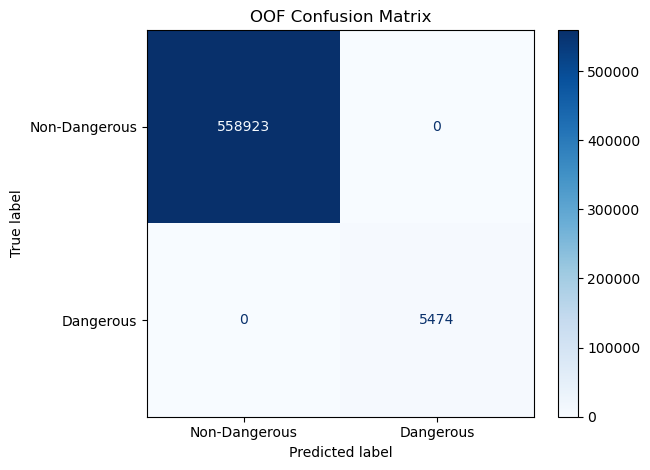

Number of dangerous lane changes: 5474
Number of non-dangerous lane changes: 558923
Predicted number of dangerous lane changes: 5474
Predicted number of non-dangerous lane changes: 558923


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
import xgboost as xgb

# Load data and construct features/labels
file_path = '2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# Sort and calculate delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# Label: whether it is a dangerous lane change
threshold_velocity_change = 10.0  
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# Features and labels
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y','delta_Lane','v_Vel']
X = df[features].fillna(0.0).values 
y = df['is_dangerous_lane_change'].astype(int).values

# Whether to use GroupKFold by vehicle (recommended True to avoid same-vehicle leakage across folds)
USE_GROUP_KFOLD = True

# OOF setup
n_splits = 5
if USE_GROUP_KFOLD:
    splitter = GroupKFold(n_splits=n_splits)
    groups = df['Vehicle_ID'].values
    split_iter = splitter.split(X, y, groups=groups)
else:
    splitter = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    split_iter = splitter.split(X, y)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

def make_model(pos_weight: float):
    clf = xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        scale_pos_weight=pos_weight,
        eval_metric='logloss',
        tree_method='hist'
    )
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

# Train and validate per fold (generate OOF)
for fold, (tr_idx, va_idx) in enumerate(split_iter, start=1):
    y_tr = y[tr_idx]
    pos = max(y_tr.sum(), 1)  
    neg = max(len(y_tr) - pos, 1)
    spw = neg / pos

    model = make_model(spw)
    model.fit(X[tr_idx], y_tr)

    proba = model.predict_proba(X[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# 4) Overall evaluation based on OOF
oof_acc = accuracy_score(y, oof_pred)
print(f'OOF overall accuracy: {oof_acc:.4f}')

try:
    oof_auc = roc_auc_score(y, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('Unable to calculate ROC-AUC (possibly due to extreme class imbalance).')

print('Classification report (based on OOF predictions):')
print(classification_report(y, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# Confusion matrix (OOF)
ConfusionMatrixDisplay.from_predictions(
    y_true=y,
    y_pred=oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# Count sample numbers
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f"Number of dangerous lane changes: {dangerous_lane_changes}")
print(f"Number of non-dangerous lane changes: {non_dangerous_lane_changes}")

pos_all = max(y.sum(), 1)
neg_all = max(len(y) - pos_all, 1)
final_model = make_model(neg_all / pos_all).fit(X, y)

# Count predicted dangerous and non-dangerous lane changes
predicted_dangerous = int((oof_pred == 1).sum()) 
predicted_non_dangerous = int((oof_pred == 0).sum()) 

print(f"Predicted number of dangerous lane changes: {predicted_dangerous}")
print(f"Predicted number of non-dangerous lane changes: {predicted_non_dangerous}")


Decision Tree

Fold 1/5 accuracy: 0.9841
Fold 2/5 accuracy: 0.9843
Fold 3/5 accuracy: 0.9844
Fold 4/5 accuracy: 0.9844
Fold 5/5 accuracy: 0.9838
--------------------------------------------------
CV mean accuracy (per-fold): 0.9842
OOF overall accuracy: 0.9842
OOF ROC-AUC: 0.6141
Classification Report
               precision    recall  f1-score   support

Non-Dangerous       0.99      0.99      0.99    558923
    Dangerous       0.21      0.24      0.23      5474

     accuracy                           0.98    564397
    macro avg       0.60      0.61      0.61    564397
 weighted avg       0.98      0.98      0.98    564397



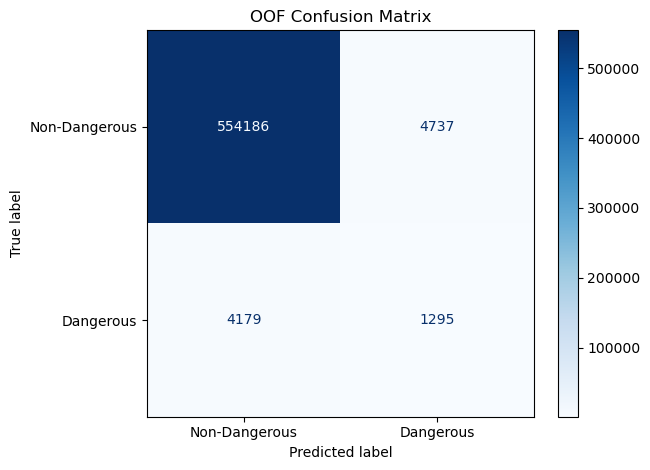

dangerous_lane_changes: 5474
non_dangerous_lane_changes: 558923
predicted_dangerous: 6032
predicted_non_dangerous: 558365

Results saved to: 3Weixianbiandao.csv


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)

# Reading and feature/tag construction
file_path = '2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# Speed threshold (feet per second)
threshold_velocity_change = 10.0

# Definition label: Is it dangerous to change lanes (True/False)
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# Feature
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features].fillna(0.0)  
y = df['is_dangerous_lane_change'].astype(int) 

#  OOF 
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

# Model
def make_model():
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42))
    ])

# Incremental training and validation
X_values = X.values
y_values = y.values

for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_values, y_values)):  
    model = make_model()
    model.fit(X_values[tr_idx], y_values[tr_idx])

    proba = model.predict_proba(X_values[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y_values[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold_idx+1}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# OOF 
oof_accuracy = accuracy_score(y_values, oof_pred)
print(f'OOF overall accuracy: {oof_accuracy:.4f}')

try:
    oof_auc = roc_auc_score(y_values, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('Calculate ROC-AUC')

print('Classification Report')
print(classification_report(y_values, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# Confusion matrix (OOF)
ConfusionMatrixDisplay.from_predictions(
    y_values, oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# The number of statistical samples
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f'dangerous_lane_changes: {dangerous_lane_changes}')
print(f'non_dangerous_lane_changes: {non_dangerous_lane_changes}')

final_model = make_model().fit(X_values, y_values)

predicted_dangerous = int((oof_pred == 1).sum()) 
predicted_non_dangerous = int((oof_pred == 0).sum())  

print(f"predicted_dangerous: {predicted_dangerous}")
print(f"predicted_non_dangerous: {predicted_non_dangerous}")

df_out = df.copy()
df_out['predicted_lane_change'] = oof_pred

save_path = '3Weixianbiandao.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")


Fold 1/5 accuracy: 1.0000
Fold 2/5 accuracy: 1.0000
Fold 3/5 accuracy: 1.0000
Fold 4/5 accuracy: 1.0000
Fold 5/5 accuracy: 1.0000
--------------------------------------------------
CV mean accuracy (per-fold): 1.0000
OOF overall accuracy: 1.0000
OOF ROC-AUC: 0.9999
Classification Report
               precision    recall  f1-score   support

Non-Dangerous       1.00      1.00      1.00    558923
    Dangerous       1.00      1.00      1.00      5474

     accuracy                           1.00    564397
    macro avg       1.00      1.00      1.00    564397
 weighted avg       1.00      1.00      1.00    564397



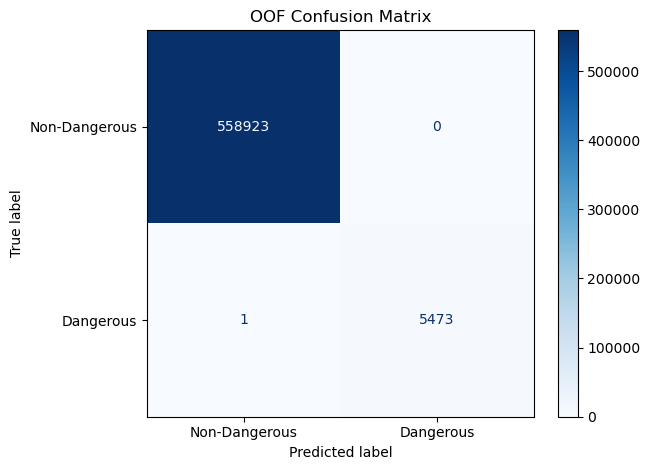

dangerous_lane_changes: 5474
non_dangerous_lane_changes: 558923
predicted_dangerous: 5473
predicted_non_dangerous: 558924

Results saved to: 3Weixianbiandao.csv


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)

# Reading and feature/tag construction
file_path = '2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# Speed threshold (feet per second)
threshold_velocity_change = 10.0

# Definition label: Is it dangerous to change lanes (True/False)
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# Feature
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y','delta_Lane','v_Vel']
X = df[features].fillna(0.0)  
y = df['is_dangerous_lane_change'].astype(int) 

#  OOF 
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

# Model
def make_model():
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42))
    ])

# Incremental training and validation
X_values = X.values
y_values = y.values

for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_values, y_values)):  
    model = make_model()
    model.fit(X_values[tr_idx], y_values[tr_idx])

    proba = model.predict_proba(X_values[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y_values[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold_idx+1}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# OOF 
oof_accuracy = accuracy_score(y_values, oof_pred)
print(f'OOF overall accuracy: {oof_accuracy:.4f}')

try:
    oof_auc = roc_auc_score(y_values, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('Calculate ROC-AUC')

print('Classification Report')
print(classification_report(y_values, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# Confusion matrix (OOF)
ConfusionMatrixDisplay.from_predictions(
    y_values, oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# The number of statistical samples
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f'dangerous_lane_changes: {dangerous_lane_changes}')
print(f'non_dangerous_lane_changes: {non_dangerous_lane_changes}')

final_model = make_model().fit(X_values, y_values)

predicted_dangerous = int((oof_pred == 1).sum()) 
predicted_non_dangerous = int((oof_pred == 0).sum())  

print(f"predicted_dangerous: {predicted_dangerous}")
print(f"predicted_non_dangerous: {predicted_non_dangerous}")

df_out = df.copy()
df_out['predicted_lane_change'] = oof_pred

save_path = '3Weixianbiandao.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")


1.4 Collision Risk

In [32]:
# Check for infinite (inf) values
inf_values = (df == float('inf')) | (df == -float('inf'))
num_inf_values = inf_values.sum()

# Check for missing values (NaN)
missing_values = df.isna()
num_missing_values = missing_values.sum()

# Print the counts of infinite and missing values
print(f"The number of infinite values in each column：\n{num_inf_values}")
print(f"\nThe number of missing values in each column：\n{num_missing_values}")

# If there are infinities or missing values, print the corresponding rows
print("\nThere are infinitely many rows.：")
print(df[inf_values.any(axis=1)])

print("\nRows containing missing values：")
print(df[missing_values.any(axis=1)])


The number of infinite values in each column：
Vehicle_ID                    0
Frame_ID                      0
Total_Frames                  0
Global_Time                   0
Local_X                       0
Local_Y                       0
Global_X                      0
Global_Y                      0
v_length                      0
v_Width                       0
v_Class                       0
v_Vel                         0
v_Acc                         0
Lane_ID                       0
Preceding                     0
Following                     0
Space_Headway                 0
Time_Headway                  0
Location                      0
predicted_brake_level         0
predicted_brake_level_name    0
delta_X                       0
delta_Y                       0
delta_time                    0
ratio_X_Y                     0
is_sinuous                    0
predicted_sinuous             0
delta_Lane                    0
is_dangerous_lane_change      0
dtype: int64

The number o

XGBoost

In [34]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is already loaded
file_path = '3Weixianbiandao.csv'
df = pd.read_csv(file_path)
# Set Time-to-Collision thresholds
high_risk_threshold = 2.0 
low_risk_threshold = 3.0   

# Handle v_Vel = 0 cases, directly mark as No_Risk
df['TTC'] = df['Space_Headway'] / df['v_Vel']
df.loc[df['v_Vel'] == 0, 'TTC'] = float('nan')  # When v_Vel is 0, set TTC to NaN (considered as No_Risk)

# Create risk categories 
df['risk_category'] = 'No_Risk'  
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'

# Convert target variable to numeric labels (No_Risk = 0, Low_Risk = 1, High_Risk = 2)
df['risk_category'] = df['risk_category'].map({'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2})

# Feature engineering: select required features
features = [ 'Time_Headway','v_Acc','Local_X','Local_Y'] 

# Create feature data and target data
X = df[features]
y = df['risk_category']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(
    eval_metric='mlogloss', 
    missing=float('nan'),
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Output confusion matrix and other evaluation metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9971
[[32891    54    13]
 [   52 36115   104]
 [    1   100 43550]]


Fold 1 acc: 0.9967
Fold 2 acc: 0.9971
Fold 3 acc: 0.9967
Fold 4 acc: 0.9972
Fold 5 acc: 0.9966
--------------------------------------------------
OOF acc: 0.9969
              precision    recall  f1-score   support

     No_Risk       1.00      1.00      1.00    164014
    Low_Risk       1.00      0.99      1.00    180811
   High_Risk       1.00      1.00      1.00    219572

    accuracy                           1.00    564397
   macro avg       1.00      1.00      1.00    564397
weighted avg       1.00      1.00      1.00    564397



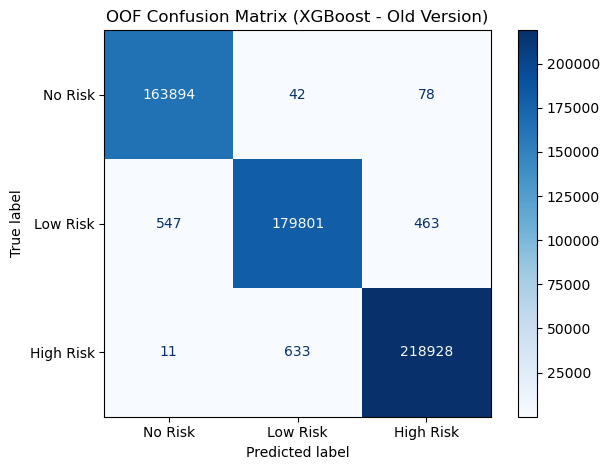


Risk category distribution of the entire dataset:
No_Risk: 164014 (29.06%)
Low_Risk: 180811 (32.04%)
High_Risk: 219572 (38.9%)
Total: 564397


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb

#  Assuming df is already loaded 
file_path = '3Weixianbiandao.csv'
df = pd.read_csv(file_path)
assert 'Space_Headway' in df.columns and 'v_Vel' in df.columns, "df must contain columns: Space_Headway and v_Vel"

#  Set thresholds and calculate TTC 
high_risk_threshold = 2.0
low_risk_threshold  = 3.0

df = df.copy()
df['TTC'] = df['Space_Headway'] / df['v_Vel']
df.loc[df['v_Vel'] == 0, 'TTC'] = np.nan  

#  Create labels 
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
df['risk_category'] = df['risk_category'].map(label_map).astype(int)

#  Features and labels 
features = [ 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features]
y = df['risk_category']

#  OOF setup 
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

oof_pred = pd.Series(index=X.index, dtype=int)

#  Model definition 
def make_xgb():
    return xgb.XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        n_jobs=-1,
        seed=42
    )

fold_accs = []

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    
    model = make_xgb()
    model.fit(X_tr, y_tr)
    
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va
    
    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]]))

#  Confusion matrix 
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk'])
disp.plot(cmap='Blues')
plt.title("OOF Confusion Matrix (XGBoost - Old Version)")
plt.tight_layout()
plt.show()

# Risk category distribution
order = [0, 1, 2]
name_map = {0: 'No_Risk', 1: 'Low_Risk', 2: 'High_Risk'}

risk_counts = y.value_counts().reindex(order, fill_value=0)
risk_pct = (risk_counts / len(y) * 100).round(2)

print("\nRisk category distribution of the entire dataset:")
for k in order:
    print(f"{name_map[k]}: {risk_counts[k]} ({risk_pct[k]}%)")
print(f"Total: {len(y)}")

In [36]:

pred_counts = oof_pred.value_counts().reindex(order, fill_value=0)
pred_pct = (pred_counts / len(oof_pred) * 100).round(2)

print("\nOOF Distribution of risk categories in the prediction results：")
for k in order:
    print(f"{name_map[k]}: {pred_counts[k]} ({pred_pct[k]}%)")
print(f"Total: {len(oof_pred)})")



OOF Distribution of risk categories in the prediction results：
No_Risk: 164452 (29.14%)
Low_Risk: 180476 (31.98%)
High_Risk: 219469 (38.89%)
Total: 564397)


Fold 1 acc: 0.9988
Fold 2 acc: 0.9976
Fold 3 acc: 0.9975
Fold 4 acc: 0.9978
Fold 5 acc: 0.9971
--------------------------------------------------
OOF acc: 0.9978
              precision    recall  f1-score   support

     No_Risk     0.9974    1.0000    0.9987    164014
    Low_Risk     0.9967    0.9963    0.9965    180811
   High_Risk     0.9989    0.9973    0.9981    219572

    accuracy                         0.9978    564397
   macro avg     0.9977    0.9979    0.9978    564397
weighted avg     0.9978    0.9978    0.9978    564397



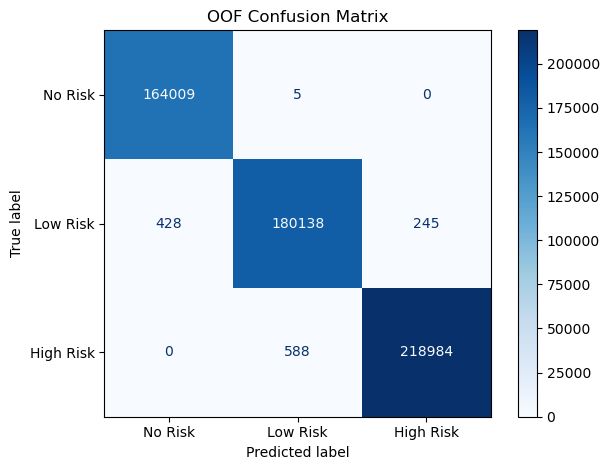


Predicted class count distribution:
No_Risk      164437
Low_Risk     180731
High_Risk    219229
Name: count, dtype: int64

Results saved to: 4Pengzhuangfengxian.csv


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Assuming df is already loaded
file_path = '3Weixianbiandao.csv'
df = pd.read_csv(file_path)
required_cols = ['Space_Headway', 'v_Vel', 'v_Acc', 'Time_Headway']
assert all(col in df.columns for col in required_cols), f"df must contain columns: {required_cols}"

# Labeling 
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # Prevent division by zero

df = df.copy()
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # Absolutely safe

df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y = df['risk_category'].map(label_map).astype(int)

# Features (excluding TTC)
features = ['v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway','TTC','Local_X','Local_Y']
X = df[features].astype(float)

mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

# OOF setup
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof_pred = pd.Series(index=X.index, dtype=int)

# XGBoost model
def make_xgb():
    return XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss',
        max_depth=4,
        learning_rate=0.1,
        n_estimators=200,
        min_child_weight=50,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=1,
        random_state=42,
        tree_method='hist'
    )

# Cross-validation
fold_accs = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = make_xgb()
    model.fit(X_tr, y_tr)
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va

    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

# Output overall performance
print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]], digits=4))

# Save OOF predictions
df.loc[oof_pred.index, 'oof_pred'] = oof_pred

# Confusion matrix
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix")
plt.tight_layout()
plt.show()

# Predicted class counts
pred_counts = oof_pred.value_counts().sort_index()
pred_counts.index = [inv_label_map[i] for i in pred_counts.index]
print("\nPredicted class count distribution:")
print(pred_counts)

# Save results to '4Pengzhuangfengxian' file
df_out = df.copy()
df_out['predicted_risk'] = oof_pred

# Save file
save_path = '4Pengzhuangfengxian.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")

Decision Tree

Fold 1 acc: 0.9965
Fold 2 acc: 0.9969
Fold 3 acc: 0.9966
Fold 4 acc: 0.9969
Fold 5 acc: 0.9963
--------------------------------------------------
OOF acc: 0.9966
              precision    recall  f1-score   support

     No_Risk     0.9965    0.9993    0.9979    164014
    Low_Risk     0.9934    0.9968    0.9951    180811
   High_Risk     0.9995    0.9945    0.9970    219572

    accuracy                         0.9966    564397
   macro avg     0.9964    0.9969    0.9967    564397
weighted avg     0.9967    0.9966    0.9966    564397



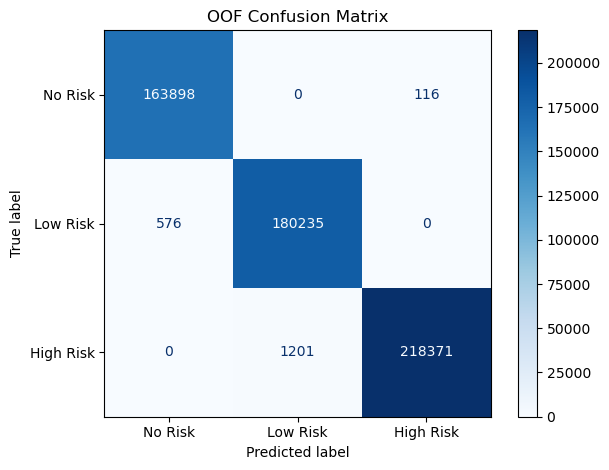

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

file_path = '3Weixianbiandao.csv'
df = pd.read_csv(file_path)
required_cols = ['Space_Headway', 'v_Vel', 'v_Acc', 'Time_Headway']
assert all(col in df.columns for col in required_cols), f"df must contain columns: {required_cols}"

# Labeling 
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # Prevent division by zero

df = df.copy()

# Calculate TTC 
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # Absolutely safe

# Labels: No(0)/Low(1)/High(2)
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'  # Force No Risk when velocity is zero

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y = df['risk_category'].map(label_map).astype(int)

# Features 
features = [ 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features].astype(float)

# Remove missing values
mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

# OOF setup
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof_pred = pd.Series(index=X.index, dtype=int)

# Decision tree
def make_dt():
    n = len(X)
    return DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,                 
        min_samples_leaf=max(500, n // 2000),
        min_samples_split=max(1000, n // 1000),
        ccp_alpha=0.005,                
        class_weight='balanced',
        random_state=42
    )

fold_accs = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = make_dt()
    model.fit(X_tr, y_tr)
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va

    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

# Output overall performance
print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]], digits=4))

# Save OOF predictions to df
df.loc[oof_pred.index, 'oof_pred'] = oof_pred

# Confusion matrix visualization
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix")
plt.tight_layout()
plt.show()

In [39]:
pred_counts = oof_pred.value_counts().sort_index() 
pred_counts.index = [inv_label_map[i] for i in pred_counts.index] 
print("\nPrediction of the distribution of category quantities：")
print(pred_counts)


Prediction of the distribution of category quantities：
No_Risk      164474
Low_Risk     181436
High_Risk    218487
Name: count, dtype: int64


Fold 1 acc: 1.0000
Fold 2 acc: 1.0000
Fold 3 acc: 1.0000
Fold 4 acc: 1.0000
Fold 5 acc: 1.0000
--------------------------------------------------
OOF acc: 1.0000
              precision    recall  f1-score   support

     No_Risk     1.0000    1.0000    1.0000    164014
    Low_Risk     1.0000    1.0000    1.0000    180811
   High_Risk     1.0000    1.0000    1.0000    219572

    accuracy                         1.0000    564397
   macro avg     1.0000    1.0000    1.0000    564397
weighted avg     1.0000    1.0000    1.0000    564397



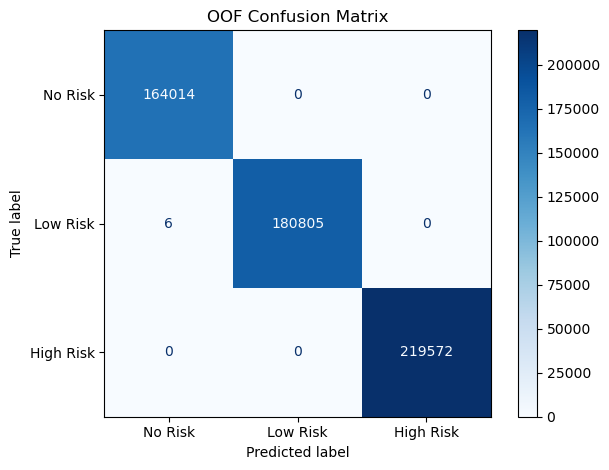

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

file_path = '3Weixianbiandao.csv'
df = pd.read_csv(file_path)
required_cols = ['Space_Headway', 'v_Vel', 'v_Acc', 'Time_Headway']
assert all(col in df.columns for col in required_cols), f"df must contain columns: {required_cols}"

# Labeling 
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # Prevent division by zero

df = df.copy()

# Calculate TTC
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # Absolutely safe

# Labels: No(0)/Low(1)/High(2)
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'  # Force No Risk when velocity is zero

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y = df['risk_category'].map(label_map).astype(int)

# Features (excluding TTC)
features = ['v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway','TTC','Local_X','Local_Y']
X = df[features].astype(float)

# Remove missing values
mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

# OOF setup
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof_pred = pd.Series(index=X.index, dtype=int)

# Decision tree 
def make_dt():
    n = len(X)
    return DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,                     
        min_samples_leaf=max(500, n // 2000),
        min_samples_split=max(1000, n // 1000),
        ccp_alpha=0.005,                  
        class_weight='balanced',
        random_state=42
    )

fold_accs = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = make_dt()
    model.fit(X_tr, y_tr)
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va

    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

# Output overall performance
print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]], digits=4))

# Save OOF predictions to df
df.loc[oof_pred.index, 'oof_pred'] = oof_pred

# Confusion matrix visualization
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix")
plt.tight_layout()
plt.show()

In [41]:

pred_counts = oof_pred.value_counts().sort_index() 
pred_counts.index = [inv_label_map[i] for i in pred_counts.index] 
print("\nPrediction of the distribution of category quantities：")
print(pred_counts)



Prediction of the distribution of category quantities：
No_Risk      164020
Low_Risk     180805
High_Risk    219572
Name: count, dtype: int64


In [42]:
# Use government-defined conditions for label prediction
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # Prevent division by zero

df = df.copy()

# Calculate TTC (only for labeling)
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # Absolutely safe

# Labels: No(0)/Low(1)/High(2)
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'  # Force No Risk when velocity is zero

# Map labels
label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y_government = df['risk_category'].map(label_map).astype(int)

# Count the number of each category
risk_counts = y_government.value_counts().reindex([0, 1, 2], fill_value=0)
risk_counts.index = [inv_label_map[i] for i in risk_counts.index]

print("\nPredicted category counts under government-defined conditions:")
print(risk_counts)


Predicted category counts under government-defined conditions:
No_Risk      164014
Low_Risk     180811
High_Risk    219572
Name: count, dtype: int64


Prediction

In [43]:
import pandas as pd

# Load the file
file_path = '4Pengzhuangfengxian.csv'
df = pd.read_csv(file_path)

# Replace 'Non-Sinuous' with 0 and 'Sinuous' with 1 in the predicted_sinuous column (convert to int to avoid FutureWarning)
df['predicted_sinuous'] = (
    df['predicted_sinuous']
    .replace({'Non-Sinuous': 0, 'Sinuous': 1})
    .astype(int)
)

# Save the modified file
output_file_path = '4Pengzhuangfengxian_.csv'
df.to_csv(output_file_path, index=False)

print(f"Modified file has been saved to: {output_file_path}")


C:\Users\13193\AppData\Local\Temp\ipykernel_15916\3511778196.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Non-Sinuous': 0, 'Sinuous': 1})


Modified file has been saved to: 4Pengzhuangfengxian_.csv


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
file_path = '4Pengzhuangfengxian_.csv'
df = pd.read_csv(file_path)


# Calculate the total score of features
df['total_score'] = df['predicted_brake_level'] + df['predicted_sinuous'] + df['predicted_lane_change'] + df['predicted_risk']

# Create abnormal driving label: when the score is greater than or equal to 4, mark as abnormal driving
df['is_abnormal_driving'] = df['total_score'].apply(lambda x: 1 if x >= 4 else 0)

# Select feature columns
features = ['predicted_brake_level', 'predicted_sinuous', 'predicted_lane_change', 'predicted_risk']
X = df[features]  # Feature matrix
y = df['is_abnormal_driving']  # Label

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Directly use the defined rule for prediction instead of training a model
y_pred = y_test  

# Evaluate the rule-based prediction
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Add prediction results as a new column to the original dataset
df['predicted_is_abnormal_driving'] = df['is_abnormal_driving']

# Save results to a new CSV file
output_file_path = '5Yichangjiashi.csv'
df.to_csv(output_file_path, index=False)

print(f"Prediction results have been saved to: {output_file_path}")


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103581
           1       1.00      1.00      1.00      9299

    accuracy                           1.00    112880
   macro avg       1.00      1.00      1.00    112880
weighted avg       1.00      1.00      1.00    112880

Prediction results have been saved to: 5Yichangjiashi.csv


In [45]:

abnormal_count = df['predicted_is_abnormal_driving'].sum() 
non_abnormal_count = len(df) - abnormal_count  

print(f"abnormal_count: {abnormal_count}")
print(f"non_abnormal_count: {non_abnormal_count}")


abnormal_count: 46631
non_abnormal_count: 517766


In [46]:
max_score = df['total_score'].max()
print(f"max_score: {max_score}")


max_score: 6.0
